In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# --------------------- Data Precess ---------------------
# Reading death data 2014-2018
# upload from local
data_14_18 = pd.read_csv("Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv", 
                    index_col="Week Ending Date",
                    parse_dates=True)

In [3]:
df_18_shape = data_14_18.shape
print(df_18_shape)

(14094, 29)


In [4]:
data_14_18.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),...,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
Week Ending Date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,Alabama,2014,1,355,327,NaN,60.0,NaN,10.0,NaN,...,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
2014-01-11,Alabama,2014,2,872,792,23.0,163.0,23.0,35.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-18,Alabama,2014,3,1044,971,21.0,209.0,34.0,31.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-25,Alabama,2014,4,1022,967,25.0,205.0,23.0,25.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,Alabama,2014,5,1040,953,18.0,200.0,26.0,38.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# select columns
df_14_18 = data_14_18.iloc[:, :16]
print(df_14_18)

                 Jurisdiction of Occurrence  MMWR Year  MMWR Week  All  Cause  \
Week Ending Date                                                                
2014-01-04                          Alabama       2014          1         355   
2014-01-11                          Alabama       2014          2         872   
2014-01-18                          Alabama       2014          3        1044   
2014-01-25                          Alabama       2014          4        1022   
2014-02-01                          Alabama       2014          5        1040   
...                                     ...        ...        ...         ...   
2018-12-01                    United States       2018         48       55210   
2018-12-08                    United States       2018         49       56095   
2018-12-15                    United States       2018         50       56530   
2018-12-22                    United States       2018         51       56689   
2018-12-29                  

In [6]:
# rename
df_14_18 = df_14_18.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "MMWR Year" : "year",
    "MMWR Week" : "week",
    "All  Cause" : "total_death"
})
df_14_18 = df_14_18.rename_axis("date")
df_14_18.head()

,location,year,week,total_death,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69)
date,,,,,,,,,,,,,,,,
2014-01-04,Alabama,2014,1,355,327,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0
2014-01-11,Alabama,2014,2,872,792,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0
2014-01-18,Alabama,2014,3,1044,971,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0
2014-01-25,Alabama,2014,4,1022,967,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0
2014-02-01,Alabama,2014,5,1040,953,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0


In [7]:
data_19_20 = pd.read_csv("Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv", 
                    index_col="Week Ending Date", 
                    parse_dates=True)

In [8]:
df_20_shape = data_19_20.shape
df_20_shape

(5235, 33)

In [9]:
data_19_20.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
Week Ending Date,,,,,,,,,,,,,,,,,,,,,
2019-01-05,Alabama,2019,1,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-12,Alabama,2019,2,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-19,Alabama,2019,3,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-26,Alabama,2019,4,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-02,Alabama,2019,5,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# select columns
df_19_20 = data_19_20.iloc[:, :18]
df_19_20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5235 entries, 2019-01-05 to 2020-11-07
Data columns (total 18 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Jurisdiction of Occurrence                                                                         5235 non-null   object 
 1   MMWR Year                                                                                          5235 non-null   int64  
 2   MMWR Week                                                                                          5235 non-null   int64  
 3   All Cause                                                                                          5231 non-null   float64
 4   Natural Cause                                                                                      523

In [11]:
# rename
df_19_20 = df_19_20.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "All Cause" : "total_death",	
    "MMWR Year" : "year",
    "MMWR Week" : "week"
})
df_19_20 = df_19_20.rename_axis("date")
df_19_20.head()

,location,year,week,total_death,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
date,,,,,,,,,,,,,,,,,,
2019-01-05,Alabama,2019,1,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0
2019-01-12,Alabama,2019,2,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0
2019-01-19,Alabama,2019,3,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0
2019-01-26,Alabama,2019,4,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0
2019-02-02,Alabama,2019,5,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0


In [12]:
df_19 = df_19_20[df_19_20['year'] == 2019]
df_19 = df_19.iloc[:, :16]
df_20 = df_19_20[df_19_20['year'] == 2020]

In [13]:
# Intergrade the datasets
df_14_19 = pd.concat([df_14_18, df_19], axis=0)
df_14_19.head()

,location,year,week,total_death,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),Influenza and pneumonia (J09-J18)
date,,,,,,,,,,,,,,,,,
2014-01-04,Alabama,2014,1,355.0,327.0,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0,NaN
2014-01-11,Alabama,2014,2,872.0,792.0,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0,NaN
2014-01-18,Alabama,2014,3,1044.0,971.0,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0,NaN
2014-01-25,Alabama,2014,4,1022.0,967.0,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0,NaN
2014-02-01,Alabama,2014,5,1040.0,953.0,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0,NaN


In [14]:
# deal with missing value
percent_missing = df_14_19.isnull().sum() * 100 / len(df_14_19)
missing_value_df = pd.DataFrame({'column_name': df_14_19.columns, 'percent_missing': percent_missing})
print(missing_value_df)

                                                                                          column_name  \
location                                                                                     location   
year                                                                                             year   
week                                                                                             week   
total_death                                                                               total_death   
Natural Cause                                                                           Natural Cause   
Septicemia (A40-A41)                                                             Septicemia (A40-A41)   
Malignant neoplasms (C00-C97)                                           Malignant neoplasms (C00-C97)   
Diabetes mellitus (E10-E14)                                               Diabetes mellitus (E10-E14)   
Alzheimer disease (G30)                                

In [15]:
# drop columns with missing > 80%
df_14_19 = df_14_19.drop(['Influenza and pneumonia (J09-J18)'], axis = 1)
df_14_19 = df_14_19.drop('location', axis = 1)

In [16]:
# fill columns with mean values
df_14_19 = df_14_19.fillna(df_14_19.mean())

In [17]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(df_14_19['total_death'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df_14_19.drop('total_death', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [18]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 75% train and 25% test
train_features, test_features, train_labels, test_labels = train_test_split(df_14_19, labels, test_size = 0.25, random_state = 42)

In [19]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (12676, 15)
Training Labels Shape: (12676,)
Testing Features Shape: (4226, 15)
Testing Labels Shape: (4226,)


In [20]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 52)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=52)

In [21]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 5.33


In [22]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')
print(predictions)

Accuracy: 99.97 %.
[ 352.003 3586.241  242.002 ...  363.984 3651.697  997.002]


In [23]:
df_20 = df_19_20[df_19_20['year'] == 2020]
df_20 = df_20.drop(['Influenza and pneumonia (J09-J18)'], axis = 1)

df20_shape = df_20.shape
df20_shape

(2427, 17)

In [24]:
df_20['covid_death'] = df_20['COVID-19 (U071, Multiple Cause of Death)']
df_20['noncovid_death'] = df_20['total_death'] - df_20['covid_death']

In [25]:
df_20 = df_20.drop(['COVID-19 (U071, Multiple Cause of Death)'], axis = 1)
df_20 = df_20.drop(['COVID-19 (U071, Underlying Cause of Death)'], axis = 1)

In [26]:
# fill columns with mean values
df_20 = df_20.fillna(df_20.mean())

In [27]:
# Labels are the values we want to predict
actual_noncovid_20 = np.array(df_20['noncovid_death'])
actual_covid_20 = np.array(df_20['covid_death'])
actual_total_20 = np.array(df_20['total_death'])

# Remove the labels from the features
# axis 1 refers to the columns
features_20 = df_20.drop('noncovid_death', axis = 1)
features_20 = df_20.drop('covid_death', axis = 1)
features_20 = df_20.drop('total_death', axis = 1)

# Convert to numpy array
features_20 = np.array(features_20)
features_20 = np.delete(features_20, 0, 1)

In [28]:
# Use the forest's predict method on 2020's data
predictions_20 = rf.predict(features_20)
print(predictions_20)

[ 1006.991  1057.969   976.001 ... 35721.058 33311.041 32445.557]


In [29]:
# compare between prediction_20(noncovid_death) and actual non-covid death
pred_20 = pd.DataFrame(predictions_20)
df_20["pred_20"] = pred_20.iloc[:,0].values

In [30]:
df_20['difference'] = df_20['pred_20'] - df_20['noncovid_death']
print(df_20)

                 location  year  week  total_death  Natural Cause  \
date                                                                
2020-01-04        Alabama  2020     1       1080.0         1007.0   
2020-01-11        Alabama  2020     2       1125.0         1058.0   
2020-01-18        Alabama  2020     3       1039.0          976.0   
2020-01-25        Alabama  2020     4       1053.0          980.0   
2020-02-01        Alabama  2020     5       1025.0          951.0   
...                   ...   ...   ...          ...            ...   
2020-10-10  United States  2020    41      57388.0        53749.0   
2020-10-17  United States  2020    42      55210.0        52011.0   
2020-10-24  United States  2020    43      54742.0        51841.0   
2020-10-31  United States  2020    44      51178.0        48738.0   
2020-11-07  United States  2020    45      40957.0        39435.0   

            Septicemia (A40-A41)  Malignant neoplasms (C00-C97)  \
date                               

<AxesSubplot:title={'center':'Non-covid Nationwide Prediction Difference in 2020'}, xlabel='week', ylabel='difference'>

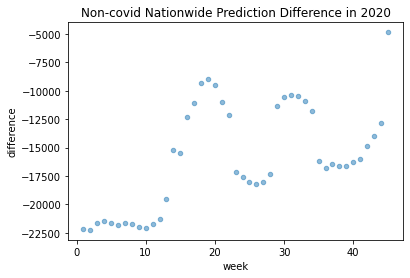

In [31]:
df_20.loc[(df_20["location"] == "United States")].plot.scatter(x="week", y="difference", alpha=0.5, title="Non-covid Nationwide Prediction Difference in 2020")

<AxesSubplot:title={'center':'Compare Predictions(non-covid) and Actual Death Nationwide'}, xlabel='date'>

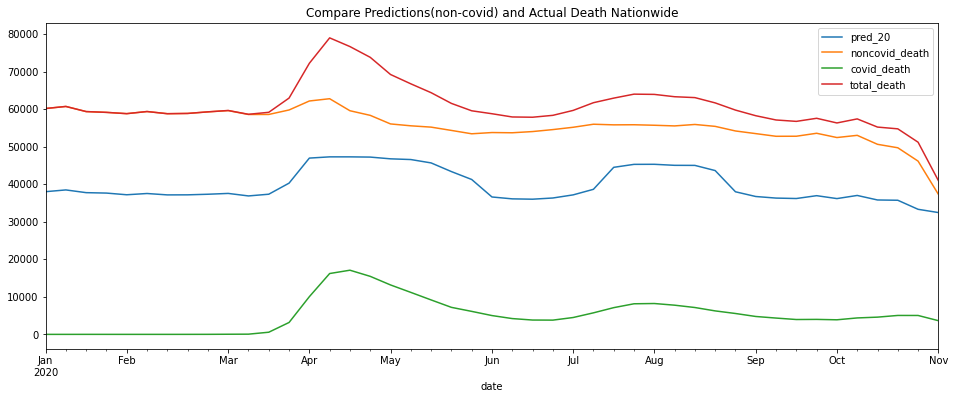

In [32]:
df_20.loc[(df_20.location == "United States"), ['pred_20','noncovid_death', 'covid_death', 'total_death']].plot(title='Compare Predictions(non-covid) and Actual Death Nationwide', figsize=(16,6))

<AxesSubplot:title={'center':'Compare Predictions(non-covid) and Actual Death in New York'}, xlabel='date'>

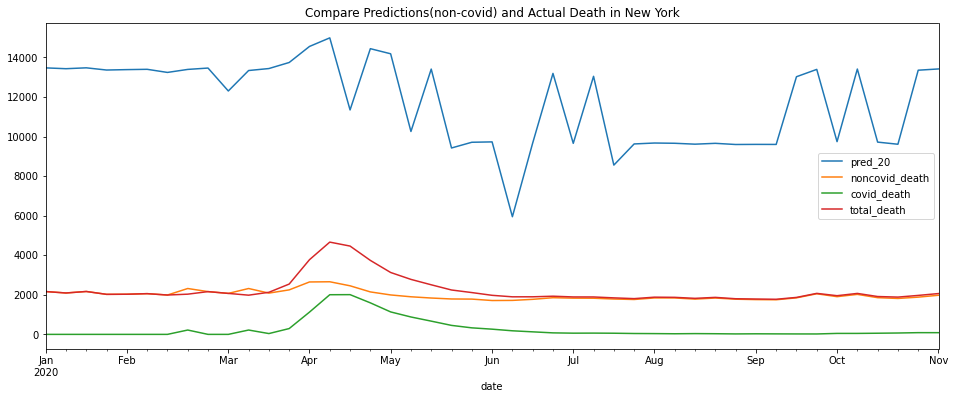

In [33]:
df_20.loc[(df_20.location == "New York"), ['pred_20','noncovid_death', 'covid_death', 'total_death']].plot(title='Compare Predictions(non-covid) and Actual Death in New York', figsize=(16,6))

<AxesSubplot:title={'center':'Compare Predictions(non-covid) and Actual Death in California State'}, xlabel='date'>

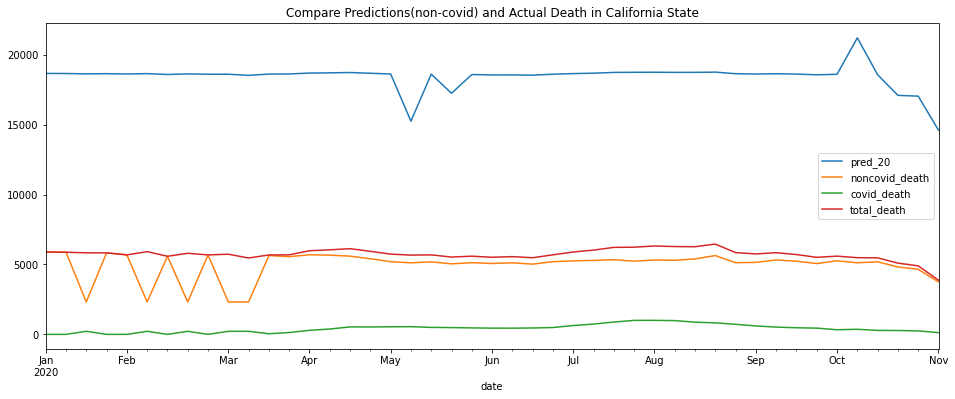

In [34]:
df_20.loc[(df_20.location == "California"), ['pred_20','noncovid_death', 'covid_death', 'total_death']].plot(title='Compare Predictions(non-covid) and Actual Death in California State', figsize=(16,6))

In [35]:
# Save the result on HDF5 file
df_20.to_hdf('result.h5', key='death_predict', mode='a')